In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
import statsmodels.formula.api as sm

# uploading file

In [2]:
file=pd.read_csv("kc_house_data.csv")
file.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
z=file.columns
z

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
file.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
filter=file.isnull()
filter.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
f1 = file[file.duplicated(keep=False)]
f1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [7]:
filter.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613


# GRAPHS

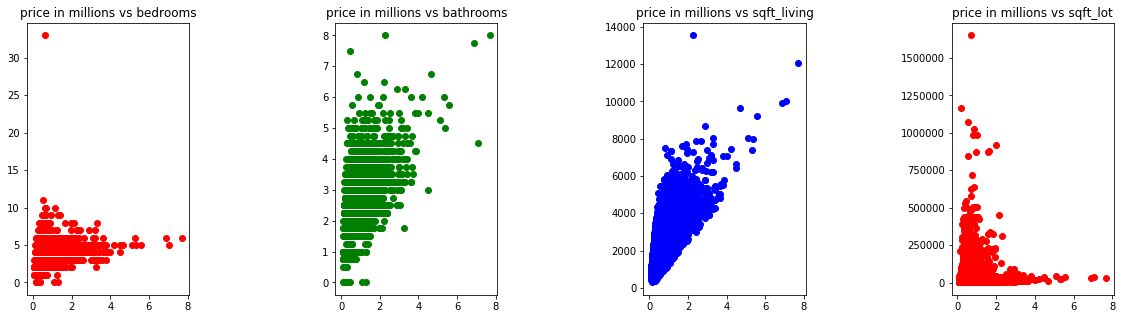

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(25,5))

plt.subplot(151)
plt.plot(file['price'] / 1000000,file['bedrooms'],'ro')
plt.title('price in millions vs bedrooms')

plt.subplot(152)
plt.plot(file['price'] / 1000000,file['bathrooms'],'go')
plt.title('price in millions vs bathrooms')

plt.subplot(153)
plt.plot(file['price'] / 1000000,file['sqft_living'],'bo')
plt.title('price in millions vs sqft_living')

plt.subplot(154)
plt.plot(file['price'] / 1000000,file['sqft_lot'],'ro')
plt.title('price in millions vs sqft_lot')

fig.subplots_adjust(wspace=.9)

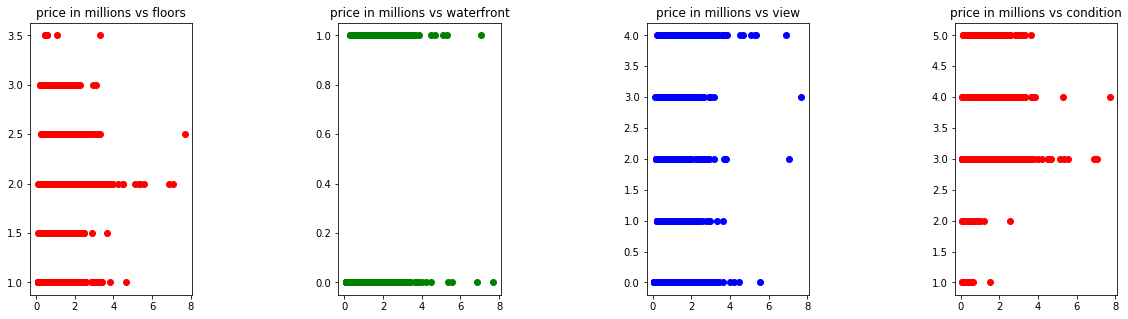

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(25,5))

plt.subplot(151)
plt.plot(file['price'] / 1000000,file['floors'],'ro')
plt.title('price in millions vs floors')

plt.subplot(152)
plt.plot(file['price'] / 1000000,file['waterfront'],'go')
plt.title('price in millions vs waterfront')

plt.subplot(153)
plt.plot(file['price'] / 1000000,file['view'],'bo')
plt.title('price in millions vs view')

plt.subplot(154)
plt.plot(file['price'] / 1000000,file['condition'],'ro')
plt.title('price in millions vs condition')

fig.subplots_adjust(wspace=.9)

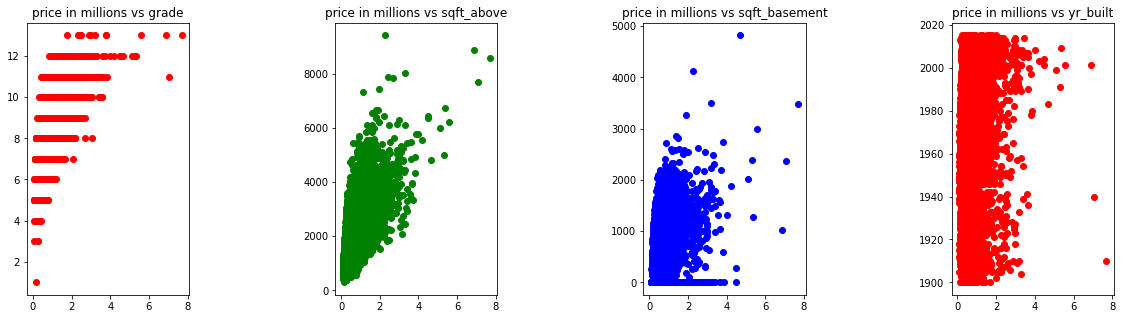

In [10]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(25,5))

plt.subplot(151)
plt.plot(file['price'] / 1000000,file['grade'],'ro')
plt.title('price in millions vs grade')

plt.subplot(152)
plt.plot(file['price'] / 1000000,file['sqft_above'],'go')
plt.title('price in millions vs sqft_above')

plt.subplot(153)
plt.plot(file['price'] / 1000000,file['sqft_basement'],'bo')
plt.title('price in millions vs sqft_basement')

plt.subplot(154)
plt.plot(file['price'] / 1000000,file['yr_built'],'ro')
plt.title('price in millions vs yr_built')

fig.subplots_adjust(wspace=.9)

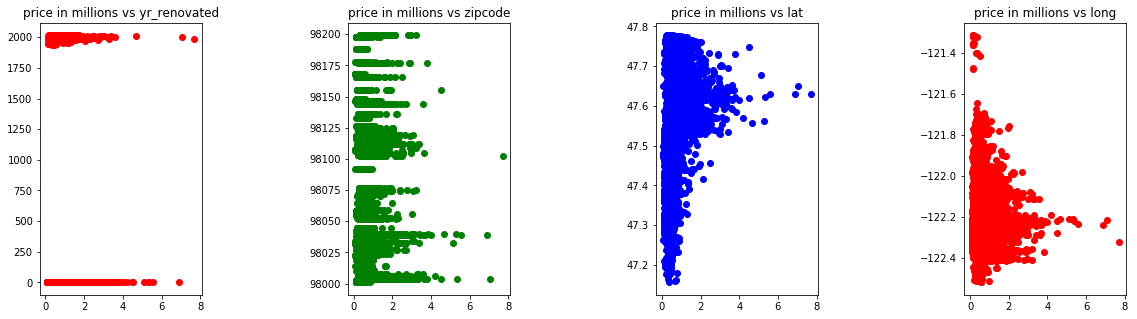

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(25,5))

plt.subplot(151)
plt.plot(file['price'] / 1000000,file['yr_renovated'],'ro')
plt.title('price in millions vs yr_renovated')

plt.subplot(152)
plt.plot(file['price'] / 1000000,file['zipcode'],'go')
plt.title('price in millions vs zipcode')

plt.subplot(153)
plt.plot(file['price'] / 1000000,file['lat'],'bo')
plt.title('price in millions vs lat')

plt.subplot(154)
plt.plot(file['price'] / 1000000,file['long'],'ro')
plt.title('price in millions vs long')

fig.subplots_adjust(wspace=.9)

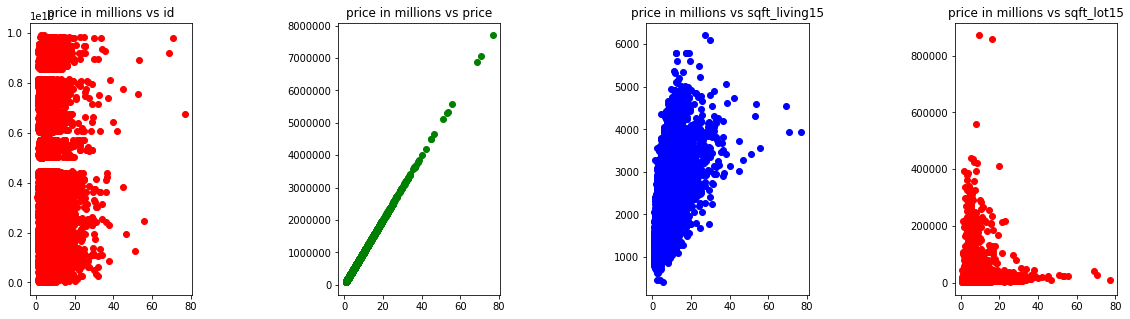

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(25,5))

plt.subplot(151)
plt.plot(file['price'] / 100000,file['id'],'ro')
plt.title('price in millions vs id')

plt.subplot(152)
plt.plot(file['price'] / 100000,file['price'],'go')
plt.title('price in millions vs price')

plt.subplot(153)
plt.plot(file['price'] / 100000,file['sqft_living15'],'bo')
plt.title('price in millions vs sqft_living15')

plt.subplot(154)
plt.plot(file['price'] / 100000,file['sqft_lot15'],'ro')
plt.title('price in millions vs sqft_lot15')

fig.subplots_adjust(wspace=.9)

# MODELS

In [13]:
model1 = sm.ols(formula='price ~ bedrooms+sqft_living+waterfront+view+grade+yr_renovated+zipcode+lat+long+sqft_living15',data=file).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     4419.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:41:50   Log-Likelihood:            -2.9557e+05
No. Observations:               21613   AIC:                         5.912e+05
Df Residuals:                   21602   BIC:                         5.912e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.532e+07   2.81e+06     -9.021      0.000   -3.08e+07   -1.98e+07
bedrooms      -2.871e+04   1924.919    -14.915      0.000   -3.25e+04   -2.49e+04
sqft_living     191.7880      3.130     61.271      0.000     185.653     197.923
waterfront     5.769e+05   1.81e+04     31.821      0.000    5.41e+05    6.12e+05
view           6.106e+04   2184.171     27.957      0.000    5.68e+04    6.53e+04
grade          7.224e+04   2026.427     35.651      0.000    6.83e+04    7.62e+04
yr_renovated     55.1000      3.609     15.269      0.000      48.027      62.173
zipcode        -508.9322     33.968    -14.983      0.000    -575.512    -442.352
lat            6.709e+05   1.09e+04     61.414      0.000    6.49e+05    6.92e+05
long          -3.513e+05   1.28e+04    -27.531      0.000   -3.76e+05   -3.26e+05
sqft_living15    27.1333      3.535      7.675      0.000      20.204      34.063
==============================================================================
Omnibus:                    17809.448   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1568794.925
Skew:                           3.429   Prob(JB):                         0.00
Kurtosis:                      44.171   Cond. No.                     1.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model1.params

Intercept       -2.532062e+07
bedrooms        -2.871056e+04
sqft_living      1.917880e+02
waterfront       5.768771e+05
view             6.106184e+04
grade            7.224349e+04
yr_renovated     5.510003e+01
zipcode         -5.089322e+02
lat              6.709012e+05
long            -3.513114e+05
sqft_living15    2.713326e+01
dtype: float64

In [15]:
model2 = sm.ols(formula='price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',data=file).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:41:51   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.939e+06   2.93e+06      2.366      0.018    1.19e+06    1.27e+07
id            -1.289e-06   4.82e-07     -2.671      0.008   -2.23e-06   -3.43e-07
bedrooms      -3.576e+04   1891.574    -18.907      0.000   -3.95e+04   -3.21e+04
bathrooms      4.116e+04   3253.218     12.651      0.000    3.48e+04    4.75e+04
sqft_living     110.3965      2.269     48.647      0.000     105.948     114.845
sqft_lot          0.1218      0.048      2.539      0.011       0.028       0.216
floors         6764.7563   3595.459      1.881      0.060    -282.608    1.38e+04
waterfront     5.827e+05   1.74e+04     33.567      0.000    5.49e+05    6.17e+05
view           5.303e+04   2140.594     24.774      0.000    4.88e+04    5.72e+04
condition      2.625e+04   2351.639     11.164      0.000    2.16e+04    3.09e+04
grade          9.601e+04   2152.926     44.594      0.000    9.18e+04       1e+05
sqft_above       70.6907      2.253     31.371      0.000      66.274      75.107
sqft_basement    39.7073      2.646     15.006      0.000      34.521      44.894
yr_built      -2622.2522     72.653    -36.093      0.000   -2764.657   -2479.847
yr_renovated     19.6458      3.656      5.374      0.000      12.481      26.811
zipcode        -582.2481     32.981    -17.654      0.000    -646.894    -517.603
lat            6.024e+05   1.07e+04     56.115      0.000    5.81e+05    6.23e+05
long          -2.128e+05   1.32e+04    -16.179      0.000   -2.39e+05   -1.87e+05
sqft_living15    21.6256      3.447      6.273      0.000      14.869      28.383
sqft_lot15       -0.3964      0.073     -5.398      0.000      -0.540      -0.252
==============================================================================
Omnibus:                    18406.018   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1881616.153
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      48.149   Cond. No.                     3.03e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.88e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
model3 = sm.ols(formula='price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',data=file).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2961.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:41:51   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.978e+06   2.89e+06      2.070      0.038    3.17e+05    1.16e+07
id            -1.282e-06   4.83e-07     -2.656      0.008   -2.23e-06   -3.36e-07
bedrooms      -3.586e+04   1890.983    -18.964      0.000   -3.96e+04   -3.22e+04
bathrooms      4.275e+04   3141.536     13.607      0.000    3.66e+04    4.89e+04
sqft_living     109.9250      2.256     48.735      0.000     105.504     114.346
sqft_lot          0.1199      0.048      2.499      0.012       0.026       0.214
waterfront     5.828e+05   1.74e+04     33.571      0.000    5.49e+05    6.17e+05
view           5.313e+04   2140.120     24.824      0.000    4.89e+04    5.73e+04
condition      2.601e+04   2348.036     11.075      0.000    2.14e+04    3.06e+04
grade          9.636e+04   2144.725     44.930      0.000    9.22e+04    1.01e+05
sqft_above       72.2687      2.091     34.555      0.000      68.169      76.368
sqft_basement    37.6547      2.411     15.617      0.000      32.929      42.381
yr_built      -2592.4815     70.913    -36.559      0.000   -2731.476   -2453.487
yr_renovated     20.0110      3.651      5.481      0.000      12.855      27.167
zipcode        -576.4547     32.839    -17.554      0.000    -640.822    -512.088
lat             6.04e+05   1.07e+04     56.463      0.000    5.83e+05    6.25e+05
long          -2.149e+05   1.31e+04    -16.401      0.000   -2.41e+05   -1.89e+05
sqft_living15    20.9038      3.426      6.101      0.000      14.188      27.619
sqft_lot15       -0.4012      0.073     -5.466      0.000      -0.545      -0.257
==============================================================================
Omnibus:                    18354.374   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1861694.626
Skew:                           3.557   Prob(JB):                         0.00
Kurtosis:                      47.908   Cond. No.                     2.88e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.64e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
model3.params

Intercept        5.977949e+06
id              -1.281594e-06
bedrooms        -3.586049e+04
bathrooms        4.274700e+04
sqft_living      1.099250e+02
sqft_lot         1.198896e-01
waterfront       5.827647e+05
view             5.312679e+04
condition        2.600516e+04
grade            9.636289e+04
sqft_above       7.226870e+01
sqft_basement    3.765473e+01
yr_built        -2.592482e+03
yr_renovated     2.001101e+01
zipcode         -5.764547e+02
lat              6.040291e+05
long            -2.149184e+05
sqft_living15    2.090381e+01
sqft_lot15      -4.011978e-01
dtype: float64

In [18]:
model4 = sm.ols(formula='price ~ id+bedrooms+bathrooms+sqft_living+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',data=file).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3145.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:41:52   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.338e+06   2.88e+06      2.197      0.028    6.84e+05     1.2e+07
id            -1.345e-06   4.82e-07     -2.792      0.005   -2.29e-06   -4.01e-07
bedrooms      -3.598e+04   1890.581    -19.033      0.000   -3.97e+04   -3.23e+04
bathrooms      4.278e+04   3141.897     13.615      0.000    3.66e+04    4.89e+04
sqft_living     110.2000      2.253     48.910      0.000     105.784     114.616
waterfront      5.82e+05   1.74e+04     33.529      0.000    5.48e+05    6.16e+05
view           5.331e+04   2139.076     24.924      0.000    4.91e+04    5.75e+04
condition       2.59e+04   2347.909     11.029      0.000    2.13e+04    3.05e+04
grade          9.647e+04   2144.585     44.981      0.000    9.23e+04    1.01e+05
sqft_above       72.5223      2.089     34.713      0.000      68.427      76.617
sqft_basement    37.6790      2.411     15.625      0.000      32.952      42.406
yr_built      -2601.3575     70.833    -36.725      0.000   -2740.195   -2462.520
yr_renovated     19.8665      3.651      5.442      0.000      12.711      27.022
zipcode        -576.4972     32.843    -17.553      0.000    -640.872    -512.122
lat            6.031e+05   1.07e+04     56.402      0.000    5.82e+05    6.24e+05
long          -2.125e+05   1.31e+04    -16.260      0.000   -2.38e+05   -1.87e+05
sqft_living15    20.3581      3.420      5.953      0.000      13.656      27.061
sqft_lot15       -0.2758      0.054     -5.148      0.000      -0.381      -0.171
==============================================================================
Omnibus:                    18334.661   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1851625.290
Skew:                           3.552   Prob(JB):                         0.00
Kurtosis:                      47.785   Cond. No.                     3.04e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.85e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
model4.params

Intercept        6.337885e+06
id              -1.345432e-06
bedrooms        -3.598262e+04
bathrooms        4.277579e+04
sqft_living      1.102000e+02
waterfront       5.820024e+05
view             5.331339e+04
condition        2.589517e+04
grade            9.646640e+04
sqft_above       7.252229e+01
sqft_basement    3.767896e+01
yr_built        -2.601358e+03
yr_renovated     1.986651e+01
zipcode         -5.764972e+02
lat              6.030542e+05
long            -2.125337e+05
sqft_living15    2.035809e+01
sqft_lot15      -2.758016e-01
dtype: float64

In [20]:
model5 = sm.ols(formula='price ~ bedrooms+bathrooms+sqft_living+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',data=file).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3353.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:41:53   Log-Likelihood:            -2.9461e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21597   BIC:                         5.894e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.11e+06   2.88e+06      2.119      0.034    4.57e+05    1.18e+07
bedrooms      -3.599e+04   1890.875    -19.035      0.000   -3.97e+04   -3.23e+04
bathrooms      4.275e+04   3142.374     13.603      0.000    3.66e+04    4.89e+04
sqft_living     110.2709      2.253     48.937      0.000     105.854     114.688
waterfront     5.823e+05   1.74e+04     33.540      0.000    5.48e+05    6.16e+05
view           5.316e+04   2138.663     24.854      0.000     4.9e+04    5.73e+04
condition      2.603e+04   2347.791     11.086      0.000    2.14e+04    3.06e+04
grade          9.635e+04   2144.492     44.927      0.000    9.21e+04    1.01e+05
sqft_above       72.6173      2.089     34.757      0.000      68.522      76.712
sqft_basement    37.6517      2.412     15.611      0.000      32.924      42.379
yr_built      -2600.1054     70.842    -36.703      0.000   -2738.962   -2461.249
yr_renovated     20.0284      3.651      5.486      0.000      12.873      27.184
zipcode        -576.7470     32.848    -17.558      0.000    -641.132    -512.362
lat            6.034e+05   1.07e+04     56.428      0.000    5.82e+05    6.24e+05
long          -2.144e+05   1.31e+04    -16.421      0.000    -2.4e+05   -1.89e+05
sqft_living15    20.3926      3.420      5.963      0.000      13.689      27.096
sqft_lot15       -0.2539      0.053     -4.789      0.000      -0.358      -0.150
==============================================================================
Omnibus:                    18311.180   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1837449.635
Skew:                           3.546   Prob(JB):                         0.00
Kurtosis:                      47.610   Cond. No.                     4.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
model5.params

Intercept        6.110138e+06
bedrooms        -3.599194e+04
bathrooms        4.274703e+04
sqft_living      1.102709e+02
waterfront       5.822787e+05
view             5.315531e+04
condition        2.602875e+04
grade            9.634638e+04
sqft_above       7.261730e+01
sqft_basement    3.765171e+01
yr_built        -2.600105e+03
yr_renovated     2.002836e+01
zipcode         -5.767470e+02
lat              6.033891e+05
long            -2.143960e+05
sqft_living15    2.039256e+01
sqft_lot15      -2.538680e-01
dtype: float64

# correlations

In [22]:
x=pd.DataFrame.corr(file)
x

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [23]:
print(x<-0.3)
x.get('True')

                  id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             False  False     False      False        False     False   
price          False  False     False      False        False     False   
bedrooms       False  False     False      False        False     False   
bathrooms      False  False     False      False        False     False   
sqft_living    False  False     False      False        False     False   
sqft_lot       False  False     False      False        False     False   
floors         False  False     False      False        False     False   
waterfront     False  False     False      False        False     False   
view           False  False     False      False        False     False   
condition      False  False     False      False        False     False   
grade          False  False     False      False        False     False   
sqft_above     False  False     False      False        False     False   
sqft_basement  False  Fal

In [ ]:
model6= sm.ols(formula='price ~ bedrooms+bathrooms+sqft_living+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15',data=file).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3586.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:41:53   Log-Likelihood:            -2.9462e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21598   BIC:                         5.894e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.121e+06   2.88e+06      2.472      0.013    1.48e+06    1.28e+07
bedrooms      -3.635e+04   1891.048    -19.220      0.000   -4.01e+04   -3.26e+04
bathrooms      4.536e+04   3108.212     14.593      0.000    3.93e+04    5.15e+04
sqft_living     110.2639      2.255     48.901      0.000     105.844     114.684
waterfront     5.876e+05   1.73e+04     33.878      0.000    5.54e+05    6.22e+05
view           5.353e+04   2138.997     25.027      0.000    4.93e+04    5.77e+04
condition      2.377e+04   2312.833     10.276      0.000    1.92e+04    2.83e+04
grade          9.682e+04   2144.163     45.157      0.000    9.26e+04    1.01e+05
sqft_above       72.7856      2.090     34.818      0.000      68.688      76.883
sqft_basement    37.4800      2.413     15.531      0.000      32.750      42.210
yr_built      -2722.6955     67.271    -40.474      0.000   -2854.552   -2590.839
zipcode        -580.6785     32.862    -17.670      0.000    -645.091    -516.266
lat            6.014e+05   1.07e+04     56.234      0.000     5.8e+05    6.22e+05
long          -2.121e+05   1.31e+04    -16.241      0.000   -2.38e+05   -1.86e+05
sqft_living15    19.2837      3.416      5.644      0.000      12.587      25.980
sqft_lot15       -0.2531      0.053     -4.771      0.000      -0.357      -0.149
==============================================================================
Omnibus:                    18302.999   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1832398.357
Skew:                           3.545   Prob(JB):                         0.00
Kurtosis:                      47.548   Cond. No.                     3.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
model7= sm.ols(formula='price ~date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',data=file).fit()
model7.summary()

In [ ]:
model8 = sm.ols(formula='price ~ id+date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',data=file).fit()
model8.summary()

In [ ]:
model9 = sm.ols(formula='price ~id+date+bedrooms+bathrooms+sqft_living+sqft_lot+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',data=file).fit()
model9.summary()

# Predictions

In [ ]:
testdata=pd.read_csv('test.csv')
testdata

In [ ]:
predicttest1 = model1.predict(testdata)
predicttest1

In [ ]:
testdata['price']

In [ ]:
predicttest2 = model2.predict(testdata)
predicttest2

In [ ]:
testdata['price']

In [ ]:
predicttest3 = model3.predict(testdata)
predicttest3

In [ ]:
testdata['price']

In [ ]:
predicttest4 = model4.predict(testdata)
predicttest4

In [ ]:
testdata['price']

In [ ]:
predicttest5 = model5.predict(testdata)
predicttest5

In [ ]:
testdata['price']

In [ ]:
predicttest6 = model6.predict(testdata)
predicttest6

In [ ]:
testdata['price']

In [ ]:
predicttest7 = model7.predict(testdata)
predicttest7

In [ ]:
testdata['price']

In [ ]:
predicttest8 = model8.predict(testdata)
predicttest8

In [ ]:
predicttest9 = model9.predict(testdata)
predicttest9

# Calculation of R-Square

In [ ]:
SSE7 = sum((testdata['price'] - predicttest7) ** 2)

In [ ]:
SST = sum((testdata['price'] - np.mean(file['price'])) ** 2)

In [65]:
R7=1-SSE7/SST
R7

0.9720690589391183

In [ ]:
SSE8 = sum((testdata['price'] - predicttest8) ** 2)

In [ ]:
SST = sum((testdata['price'] - np.mean(file['price'])) ** 2)

In [66]:
R8=1-SSE8/SST
R8

0.9692112627888413

In [67]:
SSE9 = sum((testdata['price'] - predicttest9) ** 2)

In [ ]:
SST = sum((testdata['price'] - np.mean(file['price'])) ** 2)

In [68]:
R9=1-SSE9/SST
R9

0.9675003114400711

In [ ]:
SSE2 = sum((testdata['price'] - predicttest2) ** 2)

In [ ]:
SST = sum((testdata['price'] - np.mean(file['price'])) ** 2)

In [69]:
R2=1-SSE2/SST
R2

0.9741109249352184

In [ ]:
SSE3 = sum((testdata['price'] - predicttest3) ** 2)

In [ ]:
SST = sum((testdata['price'] - np.mean(file['price'])) ** 2)

In [61]:
R3=1-SSE3/SST
R3

0.9723374046764708

# on the basis of r-square value , best prediction model is MODEL2 
      

#                                    THE END                                           #